In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
import pandas as pd
from model import Model
from agent import Agent
import yfinance as yf

In [3]:
window_size = 30
layer_size = 500
output_size = 3
money = 10000
skip = 1
iterations = 500
checkpoint = 10
commission_rate = 0.00075
ticker = "ETH-USD"
train_start="2016-01-01"
train_end="2020-05-31"
test_start="2020-05-01"
test_end="2020-12-01"

In [4]:
train_tf = yf.download(ticker, start=train_start, end=train_end)
train_close = train_tf.Close.values.tolist()
train_tf.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1613 entries, 2015-12-31 to 2020-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1613 non-null   float64
 1   High       1613 non-null   float64
 2   Low        1613 non-null   float64
 3   Close      1613 non-null   float64
 4   Adj Close  1613 non-null   float64
 5   Volume     1613 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 88.2 KB


In [5]:
test_tf = yf.download(ticker, start=test_start, end=test_end)
test_close = test_tf.Close.values.tolist()
test_tf.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-04-30 to 2020-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       215 non-null    float64
 1   High       215 non-null    float64
 2   Low        215 non-null    float64
 3   Close      215 non-null    float64
 4   Adj Close  215 non-null    float64
 5   Volume     215 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.8 KB


In [6]:
model = Model(window_size, layer_size, output_size)
agent = Agent(model, money, train_close, test_close, window_size, skip, commission_rate)
agent.fit(iterations, checkpoint)

iter 10. reward: 5507.968605
iter 20. reward: 15470.225642
iter 30. reward: 22426.843547
iter 40. reward: 26797.727567
iter 50. reward: 41327.764180
iter 60. reward: 70386.574078
iter 70. reward: 123936.025609
iter 80. reward: 154583.111658
iter 90. reward: 215201.079237
iter 100. reward: 244719.903832
iter 110. reward: 344858.238788
iter 120. reward: 338859.790508
iter 130. reward: 399931.994777
iter 140. reward: 445183.821337
iter 150. reward: 463179.200357
iter 160. reward: 539488.117980
iter 170. reward: 650815.903328
iter 180. reward: 670680.998651
iter 190. reward: 672687.205782
iter 200. reward: 794207.405060
iter 210. reward: 780266.827616
iter 220. reward: 851803.646750
iter 230. reward: 894292.476669
iter 240. reward: 950598.403002
iter 250. reward: 1022509.249347
iter 260. reward: 1039025.111649
iter 270. reward: 1135145.484981
iter 280. reward: 1136185.858565
iter 290. reward: 1248395.739289
iter 300. reward: 1353797.428136
iter 310. reward: 1344965.612170
iter 320. reward:

In [7]:
agent.simulate()

day 0: buy 48 units at price 10000.000000, total balance 0.000000, quantity 48.132981
day 3, sell 48 units at price 10145.226786, investment 1.452268 %, total balance 10145.226786, quantity 0.000000
day 4: buy 48 units at price 10145.226786, total balance 0.000000, quantity 48.697835
day 5: buy 0 units at price 0.000000, total balance 0.000000, quantity 48.697835
day 6: buy 0 units at price 0.000000, total balance 0.000000, quantity 48.697835
day 9, sell 48 units at price 10296.739693, investment 1.493440 %, total balance 10296.739693, quantity 0.000000
day 10: buy 54 units at price 10296.739693, total balance 0.000000, quantity 54.554861
day 11: buy 0 units at price 0.000000, total balance 0.000000, quantity 54.554861
day 12: buy 0 units at price 0.000000, total balance 0.000000, quantity 54.554861
day 15, sell 54 units at price 10664.163142, investment 0.000000 %, total balance 10664.163142, quantity 0.000000
day 16: buy 53 units at price 10664.163142, total balance 0.000000, quantit

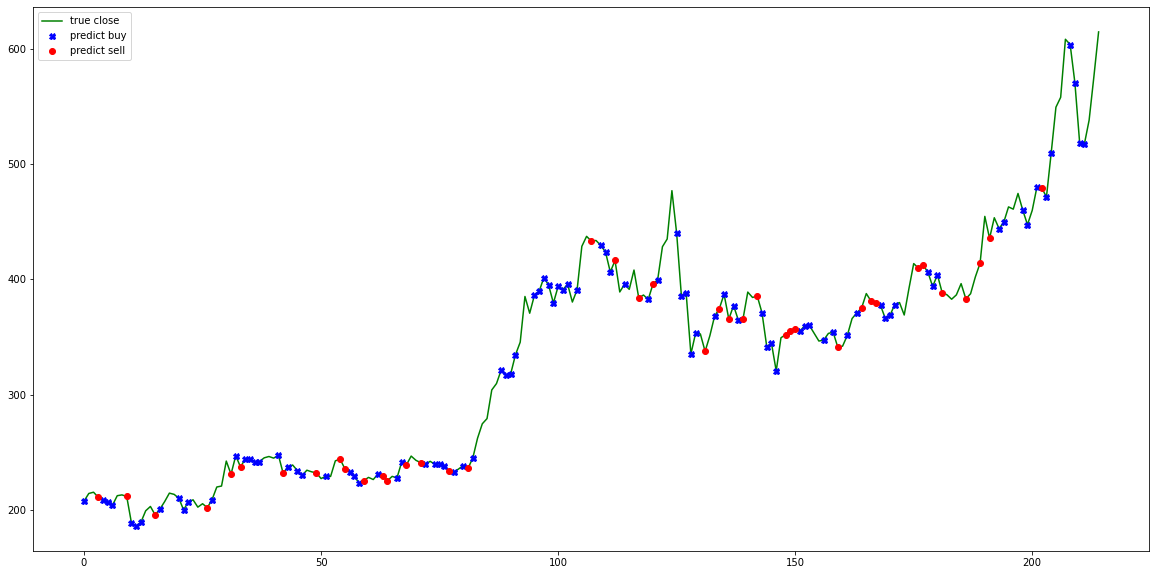

In [8]:
agent.print_history()

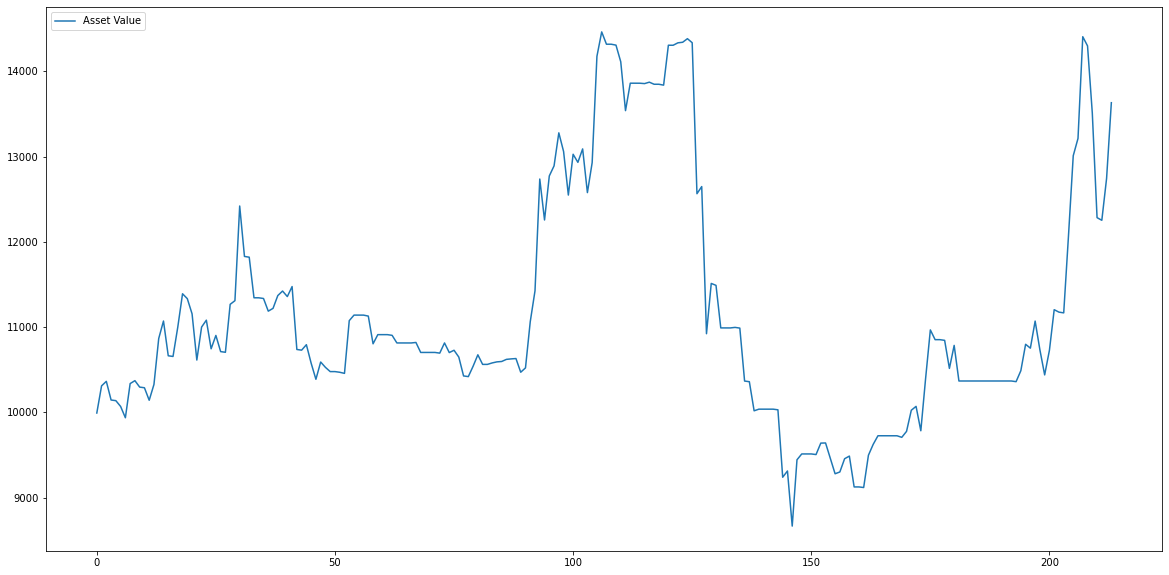

In [9]:
agent.print_asset_value()